In [242]:
# system ----
import os
import sys
import h5py
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
 
# !!! you will have to edit this to your local computer

# local ----
try:
    localPath = os.path.expanduser("~/")
    projPath = os.path.expanduser(f"{localPath}Desktop/work/jpl/analysis")
    sys.path.append(projPath+"/modules")
    import plot_parameters 
except IOError:
    pass

# !!! 

In [243]:
%matplotlib inline  
%config InlineBackend.figure_format = 'retina'
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.legend_handler import HandlerBase

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: right;
    vertical-align: middle;
}
</style>
""")

---

# Load-in data

In [259]:
class base_analysis(object):
    """Just a class to contain the base analysis attributes"""
    
    # ------------------------------------------------------------------------------------------
    
    def load_df(self, index_w_time: bool = True) -> None:
        # import time domain (light curve) data
        dataPath = f"{localPath}Desktop/work/jpl/lens_data"
        dataFile = f"{dataPath}/HE0435_Millon2020.csv"

        # Show unprocessed file contents
        if index_w_time:
            df = pd.read_csv(dataFile, index_col=0)
        else:
            df = pd.read_csv(dataFile)
        return df
    
    # ------------------------------------------------------------------------------------------

    def plot(self, obj: str = 'A') -> None:
        df = self.load_df()
        
        # Initialize figure
        fig, ax = plt.subplots(figsize=(15.25/1.2, 6.75/1.2), 
                                nrows=1, ncols=1, dpi=100)

        plt.subplots_adjust(wspace=0.1, hspace=0.035)
        ax.xaxis.set_tick_params(direction='in', which='both'); ax.yaxis.set_tick_params(direction='in', which='both')
        ax.xaxis.set_ticks_position('both'); ax.yaxis.set_ticks_position('both')
        ax.set_xscale('linear'); ax.set_yscale('linear');
        ax.set_xlim(df.index[0]-300, df.index[-1]+300)
        ax.invert_yaxis()
        
        # define matplotlib colors
        
        # plot scatter data
        if obj == "A":
            ax.scatter(df.index, df.mag_A, c='dimgray')
        elif obj == "B":
            ax.scatter(df.index, df.mag_B, c='dimgray')
        elif obj == "C":
            ax.scatter(df.index, df.mag_C, c='dimgray')
        elif obj == "D":
            ax.scatter(df.index, df.mag_D, c='dimgray')
        else:
            raise Exception("object is is either `A`, `B`, `C`, or `D`")
            
        from matplotlib.patches import Rectangle
        empty = Rectangle((0,0), 0, 0, alpha=0.0)
        sim_leg = ax.legend([empty]*7,
                        [rf'\boldmath$Object\ {obj}$'],
                       loc="lower right",frameon=False,ncol=1,
                       fontsize=20.5,handlelength=0,handletextpad=0,labelspacing=0.05)
        sim_leg.get_texts()[0].set_color('k')
        ax.add_artist(sim_leg)


        # plot labels
        ax.set_xlabel(r'$\rm HJD - 2400000.5\ [day]$'); 
        ax.set_ylabel(r'$\rm Magnitude\ [apparent]$')

        # plot legend: image name
        sim_leg = ax.legend([empty]*7,
                        [r'$\rm HE0435$-$1223$'],
                       loc="upper center",frameon=False,ncol=1,
                       fontsize=30.,handlelength=0,handletextpad=0,labelspacing=0.05)
        sim_leg.get_texts()[0].set_color('k')
        ax.add_artist(sim_leg)


        return fig, ax
    
    # ------------------------------------------------------------------------------------------

    def plot_all(self) -> None:
        df = self.load_df()
        
        # Initialize figure
        fig, ax = plt.subplots(figsize=(15.25/1.2, 6.75/1.2), 
                                nrows=1, ncols=1, dpi=100)

        plt.subplots_adjust(wspace=0.1, hspace=0.035)
        ax.xaxis.set_tick_params(direction='in', which='both'); ax.yaxis.set_tick_params(direction='in', which='both')
        ax.xaxis.set_ticks_position('both'); ax.yaxis.set_ticks_position('both')
        ax.set_xscale('linear'); ax.set_yscale('linear');
        ax.set_xlim(df.index[0]-300, df.index[-1]+300)
        ax.invert_yaxis()
        
        # define matplotlib colors
        color1 = 'm'
        color2 = 'c'
        color3 = 'darkgray'
        color4 = 'crimson'
        
        # plot scatter data
        ax.scatter(df.index, df.mag_A, c=color1)
        ax.scatter(df.index, df.mag_B+0.1, c=color2)
        ax.scatter(df.index, df.mag_C+0.5, c=color3)
        ax.scatter(df.index, df.mag_D+0.6, c=color4)

        # plot labels
        from matplotlib.patches import Rectangle
        empty = Rectangle((0,0), 0, 0, alpha=0.0)
        ax.set_xlabel(r'$\rm HJD - 2400000.5\ [day]$'); 
        ax.set_ylabel(r'$\rm Magnitude\ [apparent]$')

        # plot legend: image name
        sim_leg = ax.legend([empty]*7,
                        [r'$\rm HE0435$-$1223$'],
                       loc="upper center",frameon=False,ncol=1,
                       fontsize=30.,handlelength=0,handletextpad=0,labelspacing=0.05)
        sim_leg.get_texts()[0].set_color('k')
        ax.add_artist(sim_leg)

        # plot legend: abs mag labels
        sim_leg = ax.legend([empty]*7,
                        [r'\boldmath$A$', r'\boldmath$B_{+0.1}$', r'\boldmath$C_{+0.5}$', r'\boldmath$D_{+0.6}$'],
                       loc="lower right",frameon=False,ncol=1,
                       fontsize=20.5,handlelength=0,handletextpad=0,labelspacing=0.05)
        sim_leg.get_texts()[0].set_color(color1)
        sim_leg.get_texts()[1].set_color(color2)
        sim_leg.get_texts()[2].set_color(color3)
        sim_leg.get_texts()[3].set_color(color4)
        ax.add_artist(sim_leg)

        return fig, ax
        

In [245]:
df = base_analysis().load_df()
print(f"Number of (rows, columns): {df.shape}")
df

Number of (rows, columns): (1002, 9)


,mag_A,magerr_A,mag_B,magerr_B,mag_C,magerr_C,mag_D,magerr_D,telescope
mhjd,,,,,,,,,
52863.88300,-10.91666,0.01310,-10.38366,0.01920,-10.42866,0.01820,-10.21666,0.02220,SMARTS
52871.82900,-10.84166,0.01670,-10.38766,0.02390,-10.45966,0.02190,-10.24766,0.02510,SMARTS
52877.84300,-10.84766,0.01200,-10.37166,0.01700,-10.35066,0.01700,-10.23466,0.01800,SMARTS
52884.78400,-10.84066,0.01200,-10.36266,0.01800,-10.35966,0.01700,-10.16766,0.01900,SMARTS
52891.82700,-10.80966,0.01680,-10.32666,0.02580,-10.33566,0.02400,-10.20666,0.02610,SMARTS
...,...,...,...,...,...,...,...,...,...
58196.00534,-11.10825,0.00275,-11.08764,0.00696,-10.93054,0.00380,-10.48100,0.00402,EulerCAM
58201.01196,-11.11371,0.01857,-11.07873,0.00709,-10.94750,0.00662,-10.49538,0.01774,EulerCAM
58204.99816,-11.11443,0.00387,-11.10148,0.00655,-10.93223,0.01112,-10.48532,0.01677,EulerCAM


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1002 entries, 52863.883 to 58354.41787
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mag_A      1002 non-null   float64
 1   magerr_A   1002 non-null   float64
 2   mag_B      1002 non-null   float64
 3   magerr_B   1002 non-null   float64
 4   mag_C      1002 non-null   float64
 5   magerr_C   1002 non-null   float64
 6   mag_D      1002 non-null   float64
 7   magerr_D   1002 non-null   float64
 8   telescope  1002 non-null   object 
dtypes: float64(8), object(1)
memory usage: 78.3+ KB


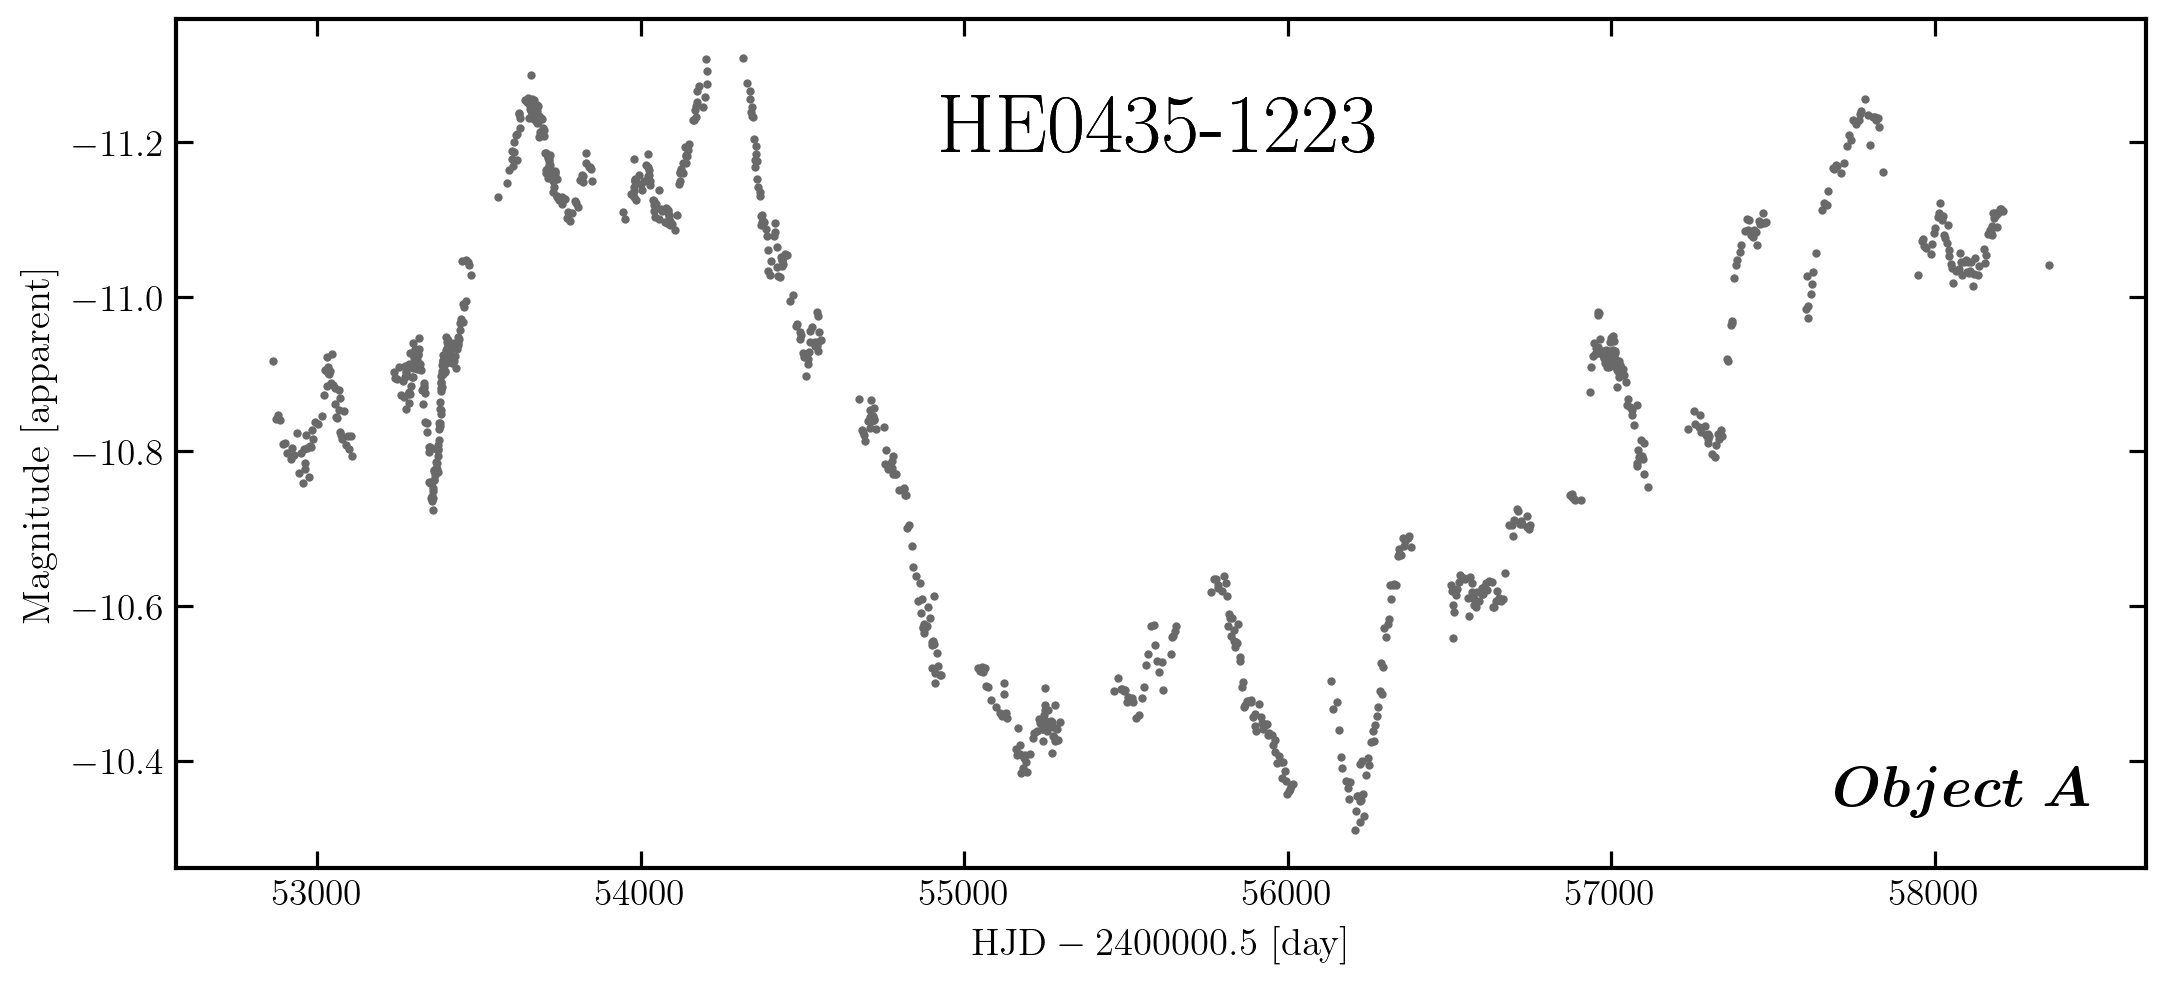

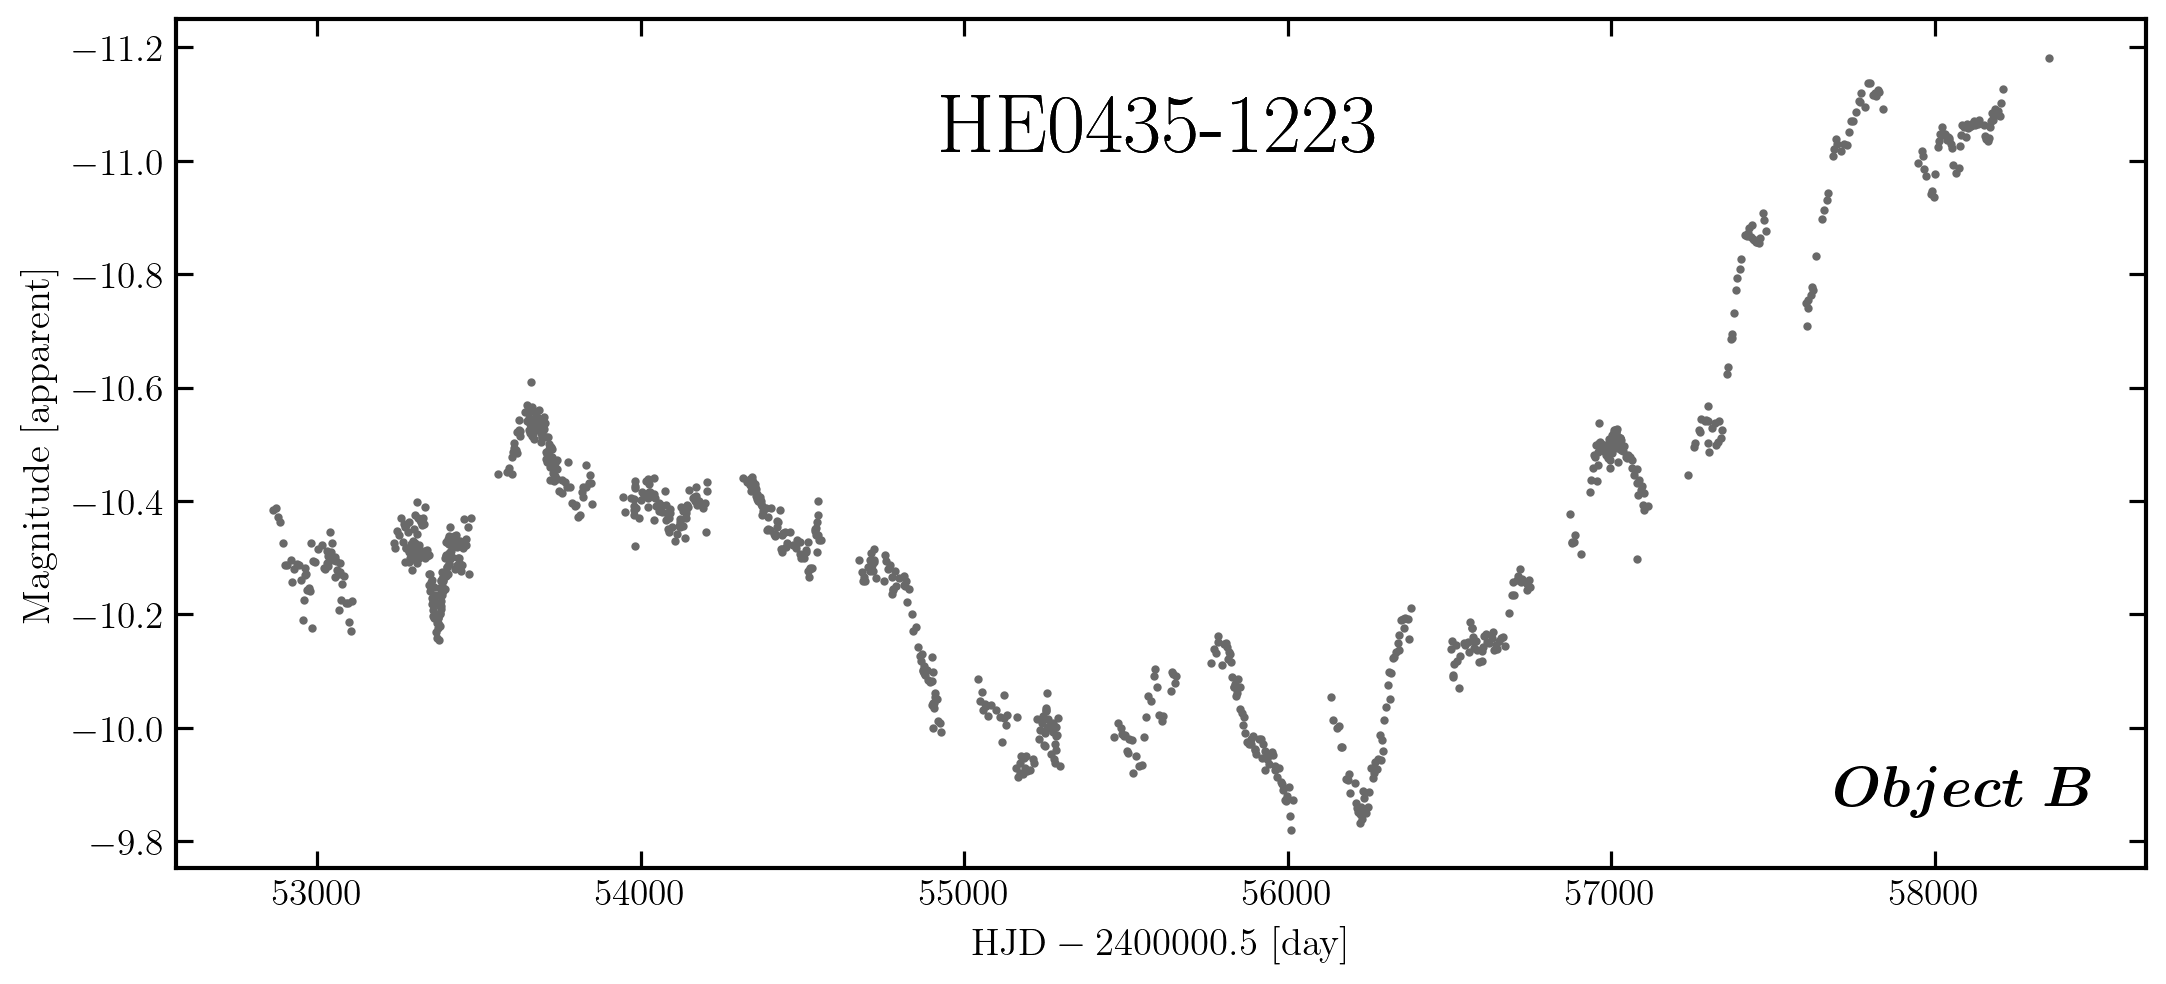

In [260]:
base_analysis().plot(obj='A');
base_analysis().plot(obj='B');

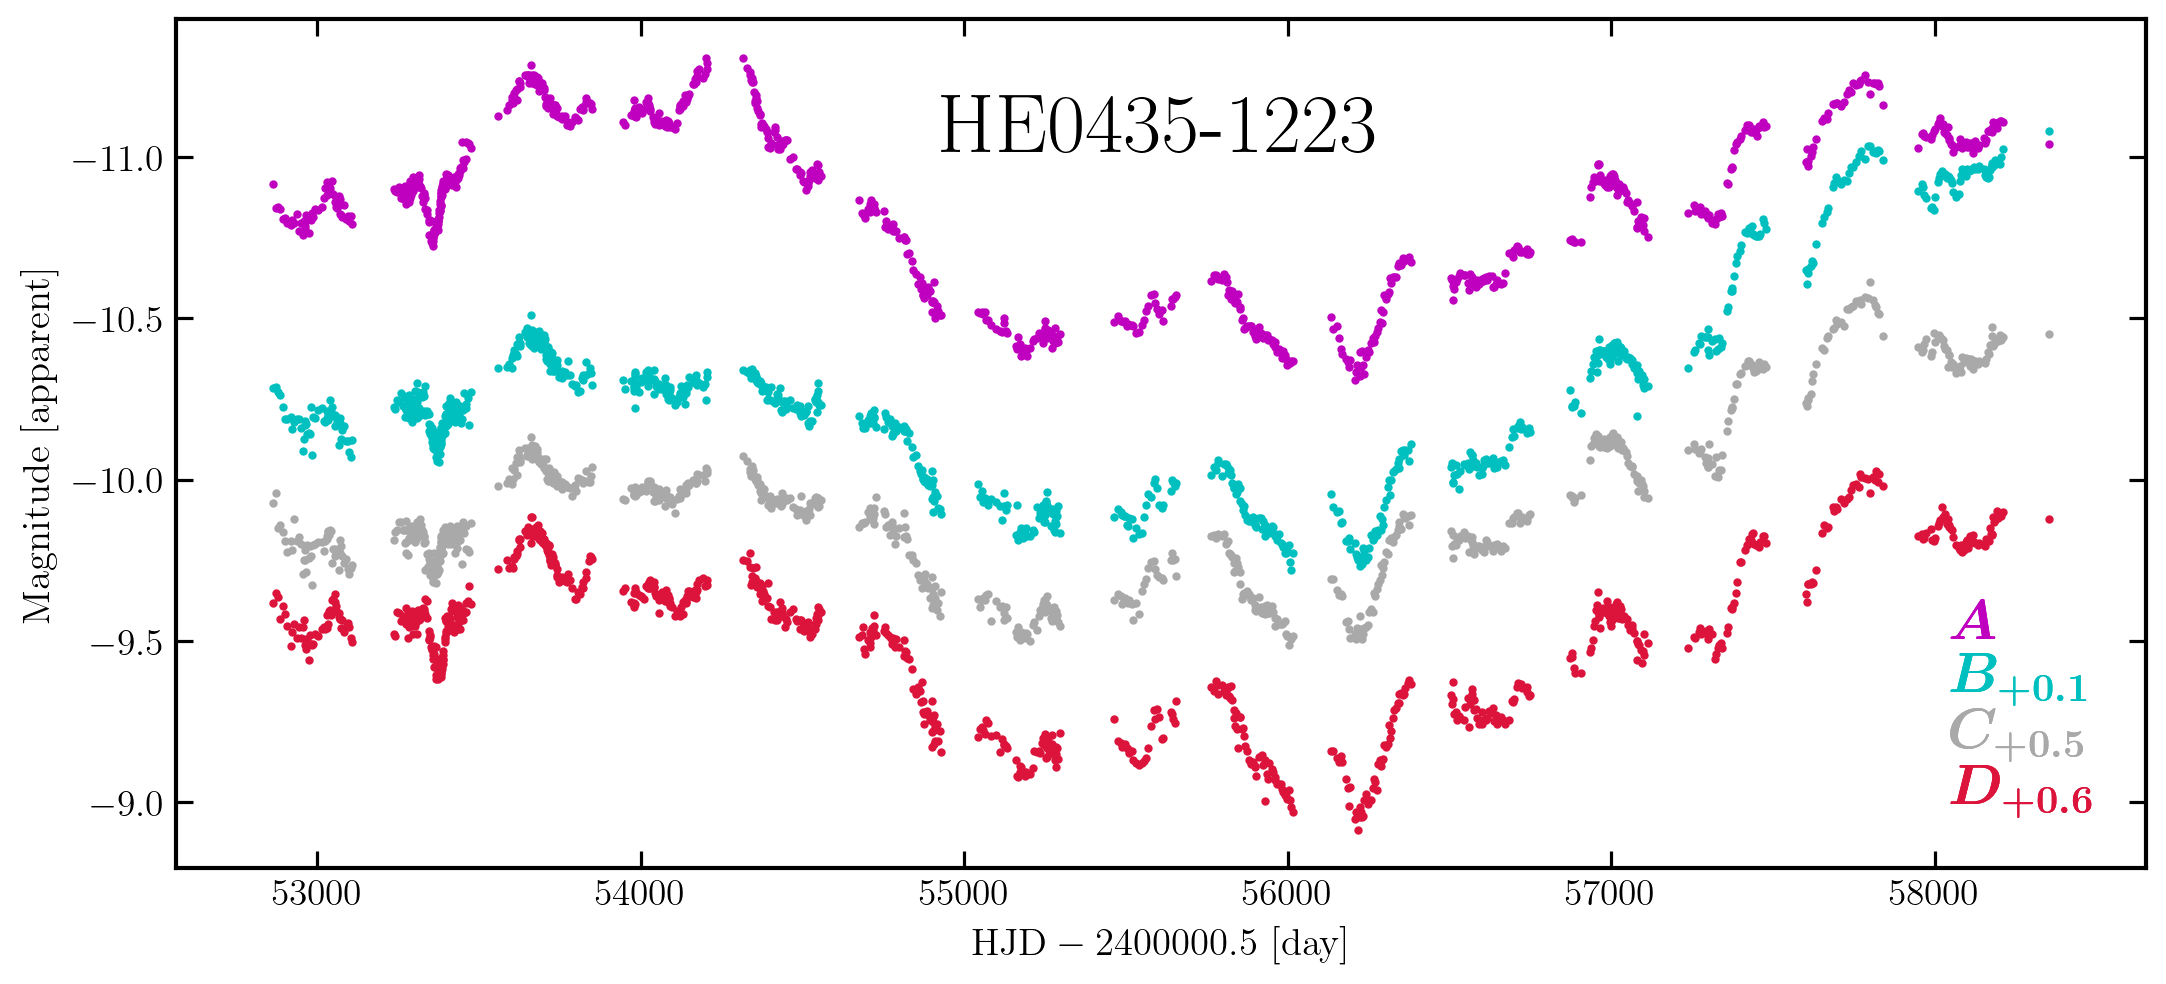

In [248]:
base_analysis().plot_all();

---
# Interpolation schemes:

* ___bbbbb___:

* ___nbbbb___:

In [261]:
class applied_analysis(base_analysis):
    
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        
    def time_array(self, nbins: int = 500) -> float:
        df = self.load_df()
        return np.linspace(df.index[0], df.index[-1], nbins)
        
    def UnivariateSpline(self, x_data: float = None, y_data: float = None, apply_all: bool = True, 
                               w: float = None, bbox: float = [None, None], 
                               k: int = 3, s: float = None, ext: int = 0, check_finite: bool = False,
                               *args, **kwargs) -> float:
        results = dict()
        
        df = self.load_df()
        
        # by default apply the univariate spline fit to a given x and y array,
        # else can apply to all magnitude date
        from scipy.interpolate import UnivariateSpline
        
        if apply_all:
            results['A'] = UnivariateSpline(df.index[:], df.mag_A[:], s=s, k=k, *args, **kwargs)
            results['B'] = UnivariateSpline(df.index[:], df.mag_B[:], s=s, k=k, *args, **kwargs)  
            results['C'] = UnivariateSpline(df.index[:], df.mag_C[:], s=s, k=k, *args, **kwargs)  
            results['D'] = UnivariateSpline(df.index[:], df.mag_D[:], s=s, k=k, *args, **kwargs)  
        else:
            results['spline'] = UnivariateSpline(x_data, y_data, *args, **kwargs)
        return results

### Set constant smoothing function but vary degree of smoothing spline by integers

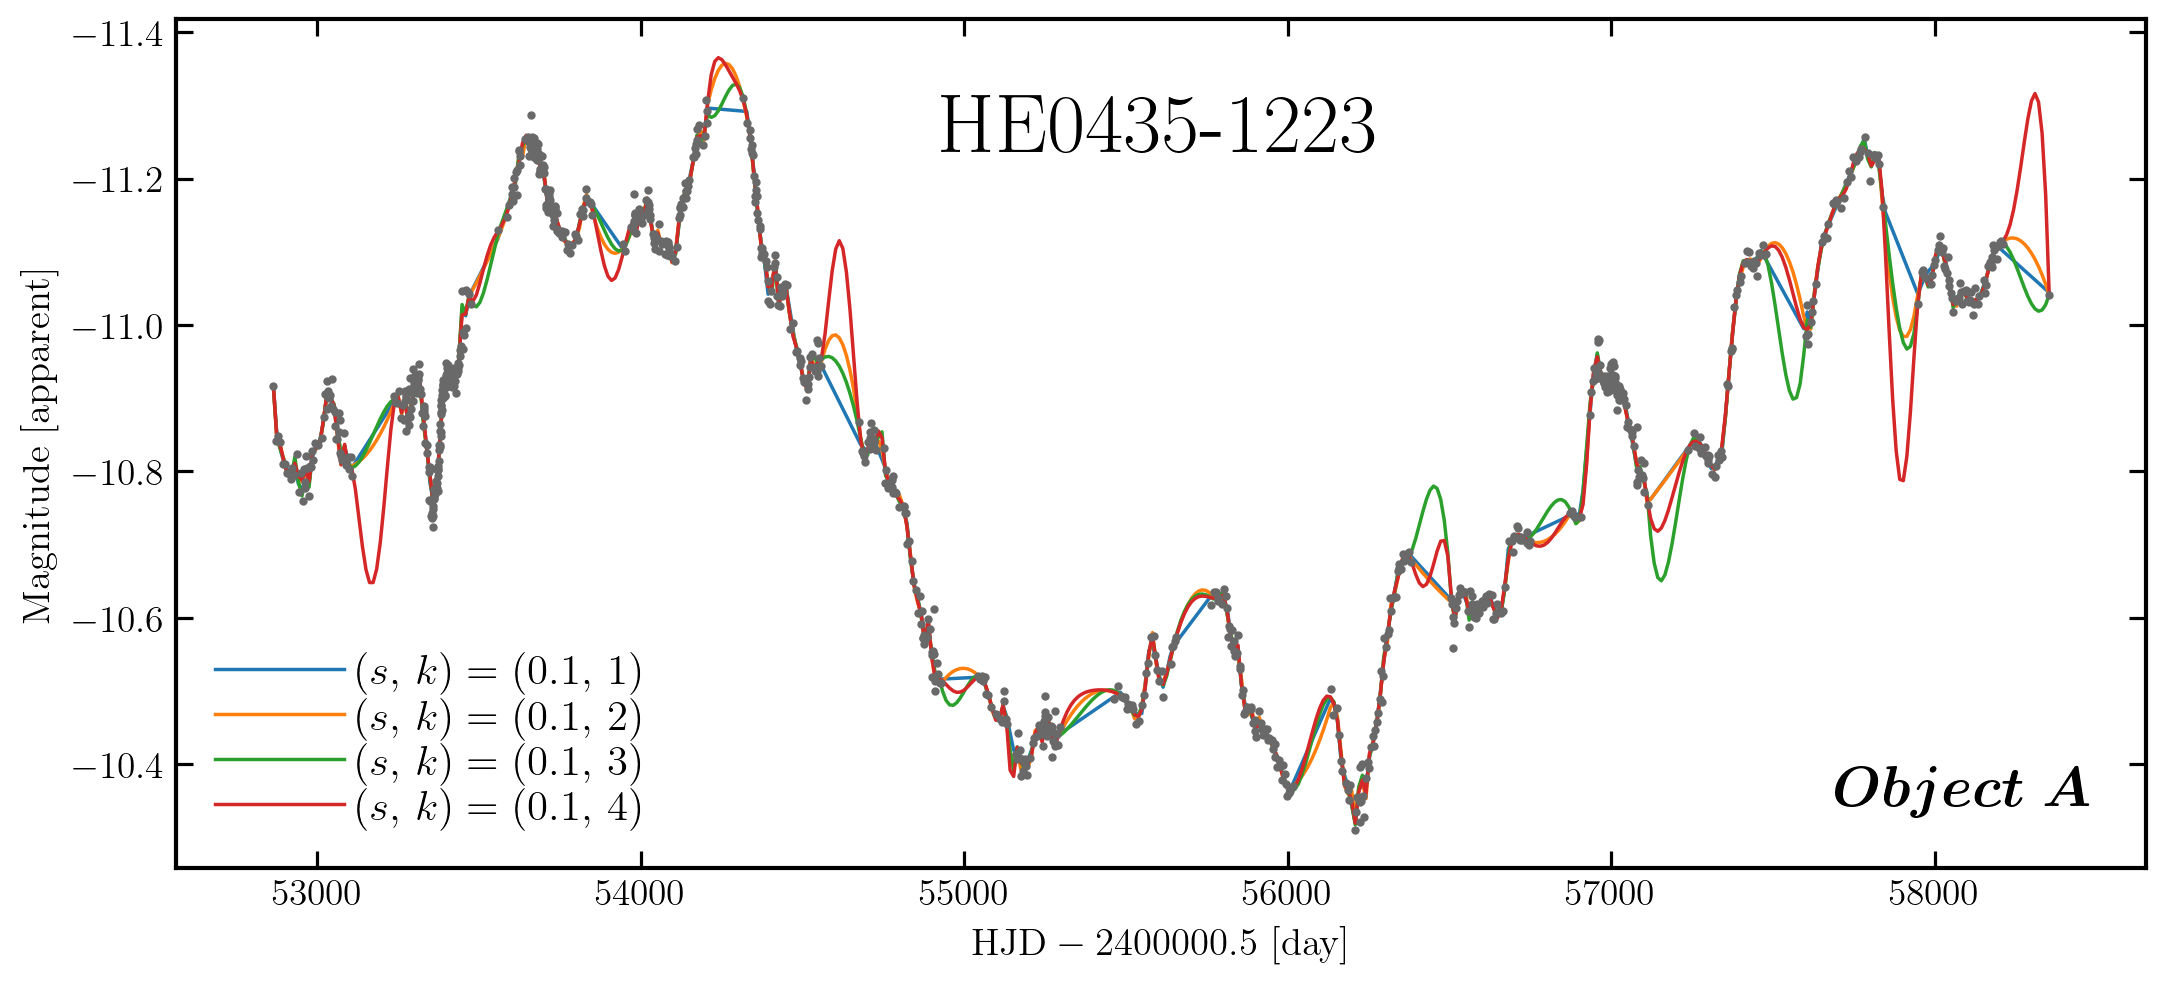

In [262]:
app = applied_analysis()
obj = 'A'

# initialize plot
fig, ax = app.plot(obj=obj)

# time array
tarr = app.time_array()

sf = 0.1 # smoothing factor
for k in range(1, 5): # degree of smoothing spline
    uspl = app.UnivariateSpline(s=sf, k=k)
    ax.plot(tarr, uspl[obj](tarr), lw=1.25, label=rf'$(s,\, k) = ({sf},\, {k})$', zorder=0);
ax.legend(frameon=False, loc='lower left', fontsize=15.5, handlelength=3, handletextpad=0.3, labelspacing=0.05);

### Vary smoothing factor for a cubic spline

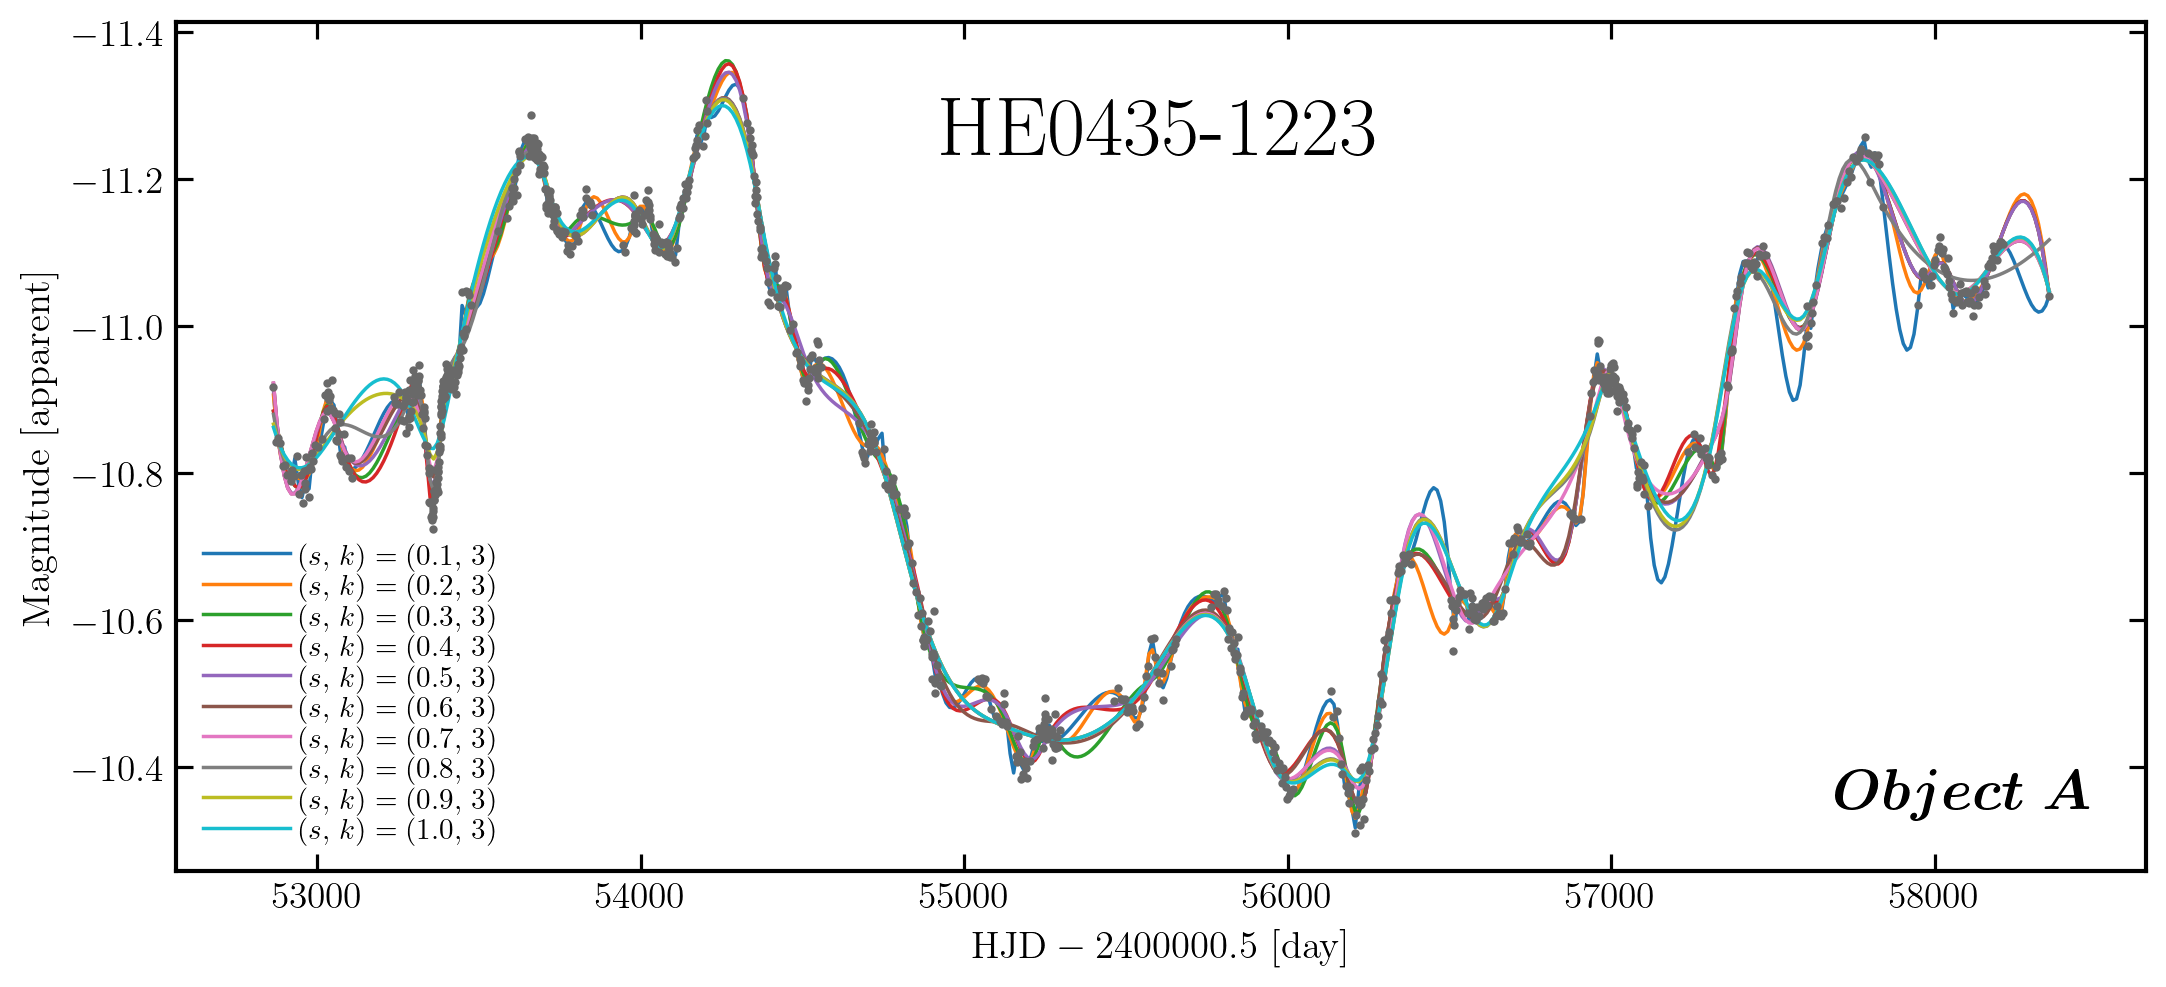

In [263]:
app = applied_analysis()
obj = 'A'

# initialize plot
fig, ax = app.plot(obj=obj);

# time array
tarr = app.time_array()

k = 3 # cubic spline
for sf in np.linspace(0.1, 1.0, 10): # degree of smoothing spline
    uspl = app.UnivariateSpline(s=sf, k=k)
    ax.plot(tarr, uspl[obj](tarr), lw=1.25, label=rf'$(s,\, k) = ({sf:0.1f},\, {k})$', zorder=0)
ax.legend(frameon=False, loc='lower left', fontsize=10.5, handlelength=3, handletextpad=0.3, labelspacing=0.05);